# Part 1
### Preprocessing phase

In [1]:
import os
import pandas as pd
import re
import unicodedata


Loop for find all hashtag in tweets. hashtag_list includes all hashtag in aggregation data. 

In [ ]:
hashtag_list = []
directory = os.path.join(".","agg_data/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            #print root+'/'+file
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            for tweet_text in df['TEXT']:
                hashtags = re.findall(r"#(\w+)", tweet_text.lower()),
                hashtag_list.extend(hashtags)
    print len(hashtag_list)

iterate each tweet and create hashtag-tweet dictionary. hastag_tweet_dict include key-values(hastag-tweets) pairs. One tweet may have more than one hastag. 

In [ ]:
hastag_tweet_dict = {}
directory = os.path.join(".","agg_data/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            #print root+'/'+file #
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            for i in range(len(df.index)):
                hashtags = re.findall(r"#(\w+)", df.iloc[i:i+1,7:8].to_string().lower())
                for hashtag in hashtags:
                    normalized_hashtag = unicodedata.normalize('NFKD', unicode(hashtag)).encode('ASCII', 'ignore')
                    if normalized_hashtag in hastag_tweet_dict:
                        hastag_tweet_dict[normalized_hashtag]=pd.concat([hastag_tweet_dict[normalized_hashtag],df.iloc[[i]]])
                    else:
                        hastag_tweet_dict[normalized_hashtag] = df.iloc[[i]]
    print len(hastag_tweet_dict)

Save each key(hashtag) as a csv file.

In [ ]:
for key, value in hastag_tweet_dict.items():
    value.to_csv("./aggbyhashtag/"+key+".csv",encoding='utf-8',sep='\t',index=None)

### Aggregate by politic category

In [ ]:
df_cat = pd.read_csv("person2side.csv",sep='\t',encoding='utf-8',header=None)
df_cat[2].unique()
df_cat.columns = [u'USERSCREENNAME', u'PARTIE',u'CAT']
df = pd.read_csv("agg_data/2016/10/20161001.csv",sep='\t',encoding='utf-8')
agg_all =  pd.merge(df, df_cat, on='USERSCREENNAME')

directory = os.path.join(".","agg_data")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            print root+'/'+file
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            agg =  pd.merge(df, df_cat, on='USERSCREENNAME')
            agg_all = agg_all.append(agg)

In [ ]:
for c in agg_all.CAT.unique():
    result = agg_all[agg_all.CAT == c]
    (result.drop(['PARTIE','CAT'], 1)).to_csv('./polcateg/'+c + '.txt',encoding='utf-8',sep='\t',index=None)

### Number of tweet distribution

In [ ]:
nmb_tweet_dist = {}
directory = os.path.join(".","aggbyhashtag/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            if len(df.index) in nmb_tweet_dist:
                nmb_tweet_dist[len(df.index)]+=1
            else:
                nmb_tweet_dist[len(df.index)]=1

In [ ]:
import matplotlib.pylab as plt
lists = nmb_tweet_dist.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel("number of twit in each doc")
plt.ylabel("number of document")
plt.show()

### Delete file contains <3 tweet

In [ ]:
directory = os.path.join(".","aggbyhashtag/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            if len(df.index)>=3:
                df.to_csv("./aggseuile/"+file+".csv",encoding='utf-8',sep='\t',index=None)

In [154]:
import hashlib
directory = os.path.join(".","aggbyhashtag/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            text_dict = {}
            for i in range(len(df.index)):
                text = df.iloc[i:i+1,7:8].to_string().lower()
                hsh = hashlib.md5(text.encode('utf-8')).hexdigest()
                if hsh in text_dict:
                    df.drop[i]
                else:
                    text_dict[hsh]=2
            df.to_csv('md5/'+file,sep='\t',encoding='utf-8',index=None)

# Part 2
### Segmentation phase

In [2]:
from stop_words import get_stop_words
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer
import pattern.fr
import unidecode
import unicodedata


In [3]:
tknzr = TweetTokenizer()
tokenizer = WordPunctTokenizer()
stoplist = get_stop_words('fr')
stoplist.extend(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','#','-','...','..',':)',';)','plus','via','contre'
                 ,'will','now','today','can','day','just','new','apres','après','','bien','faut','hui','aujourd','jour'])
stoplist.extend(get_stop_words('en'))

def get_token_tweet(tweet):
    words = tknzr.tokenize(tweet)
    word_list = []
    for i in range(len(words)):
        if not(words[i][:4]=='http' or  words[i][:1]=='@' or re.match(emoji_pattern,words[i][:])!=None):
            word_list.append(words[i])
    return " ".join(word_list)

def segment_french(text):
    tokens = tokenizer.tokenize(text)
    word_list = [word for word in tokens if word not in stoplist and len(word)>=3]
    sentence = " ".join(word_list)
    normal = unicodedata.normalize('NFKD', unicode(sentence)).encode('ASCII', 'ignore')
    return normal.split(' ')

def process(text):
    return segment_french(get_token_tweet(text))

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [4]:
tweet_text = []
directory = os.path.join(".","aggbyhashtag/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            #print root+'/'+file
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            text_part = []
            for text in df['TEXT']:
                text_part.extend(process(text.lower()))
            tweet_text.append(text_part)

/home/mc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


# Part 3
### Visualization phase

In [5]:
from gensim import corpora
import gensim

dictionary = corpora.Dictionary(tweet_text)
corpus = [dictionary.doc2bow(txt) for txt in tweet_text]
          
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=40, update_every=1, chunksize=10000, passes=1)

In [ ]:
import pyLDAvis.gensim
import json

prepare_data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pr_js = prepare_data.to_dict()
with open("lda_out.json", 'wb') as outfile:
    json.dump(pr_js, outfile)
    
pyLDAvis.display(prepare_data)

### Test Phase

In [ ]:
# for each file/category we group by week !
columns = ['DATE','CAT', 'THEME','PROB']
newDF = pd.DataFrame(columns=columns) #creates a new dataframe that's empty
newDF['THEME'] = newDF['THEME'].astype(int)
daterange = pd.date_range('20141101','20161224',freq="7D")
categories = ['Centre','Droite','Ecologistes','Extreme-Droite','Extreme-Droite,Identitaires','Extreme-Gauche','Gauche','Identitaires']
thems = range(1,41)
cnt = 0 
for date in daterange:
    for cat in categories:
        df = pd.read_csv("./polcateg/"+cat+"/"+str(date).split()[0].replace('-','')+".csv",sep='\t',encoding='utf-8',parse_dates=True)
        if len(df.index)==0:
            for them in thems:
                newDF.loc[0] = [date,cat,int(them),0]
                newDF.index = newDF.index + 1  # shifting index
                newDF = newDF.sort()
        else:
            cnt += 1
            text_part = []
            for text in df['TEXT']:
                text_part.extend(process(text.lower()))
            doc_lda = lda[dictionary.doc2bow(text_part)]
            temp,temp2 = zip(*doc_lda)
            lst = [0]*40
            for i in range(len(temp)):
                lst[temp[i]]=temp2[i]
            for them in thems:
                newDF.loc[0] = [date,cat,int(them),lst[them-1]]
                newDF.index = newDF.index + 1  # shifting index
                newDF = newDF.sort()
newDF["PROB"] = newDF["PROB"]/cnt
newDF.to_csv('prob.csv',sep='\t',encoding='utf-8',index=None)


/home/mc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)
/home/mc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
/home/mc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [164]:
import json
with open('./ldavis4/mapping.json') as data_file:    
    mapping = json.load(data_file)

fusions = mapping['fusions']

fusion_assignement = {}

for f in fusions:
    if not f[0] in fusion_assignement:
        fusion_assignement[f[0]] = [f[1]]
    else:
        fusion_assignement[f[0]].append(f[1])
df = pd.read_csv("./prob.csv",sep="\t")
for target in fusion_assignement:
    df['THEME'] = df['THEME'].replace(fusion_assignement[target], target)

df_fusion = df.groupby(['DATE','CAT','THEME']).sum().reset_index()

## rename themes
names = mapping['names']

for theme in names:
    df_fusion['THEME'] = df_fusion['THEME'].replace(int(theme),names[theme])
df_fusion.to_csv('prob_fusioned.csv',sep='\t',encoding='utf-8',index=None)

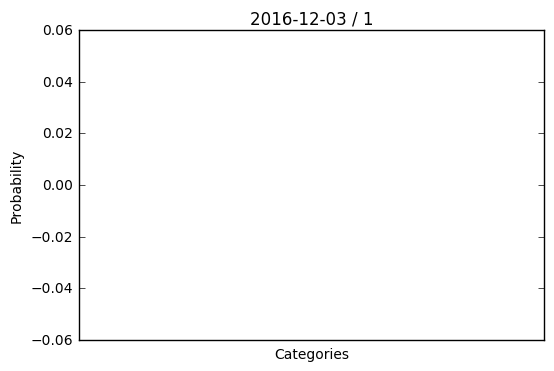

In [198]:
import numpy as np
import matplotlib.pyplot as plt
def plott(param1,param2,param3):
    df = pd.read_csv("./prob_fusioned.csv",sep='\t',encoding='utf-8',parse_dates=True)
    df['THEME'] = df['THEME'].astype(str)
    if param3 == None:
        mask = (df['DATE'] == param1) & (df['CAT']== param2) 
        df2 = df[mask]
        X = df2['THEME']
        Y = df2['PROB']
        norm = [float(i)/sum(Y) for i in Y]   
        plt.bar(range(len(X)),norm,align='center')
        plt.xticks(range(len(X)),X)
        plt.setp(plt.gca().get_xticklabels(), rotation=90,horizontalalignment='center')
        plt.ylabel('Probability')
        plt.xlabel('Themes')
        plt.title(str(param1)+" / "+str(param2))
        plt.show()   
    if param2 == None:
        mask = (df['DATE'] == param1) & (df['THEME']== param3) 
        df2 = df[mask]
        X = df2['CAT']
        Y = df2['PROB']
        norm = [float(i)/sum(Y) for i in Y]
        plt.bar(range(len(X)),norm,align='center')
        plt.xticks(range(len(X)),X)
        plt.setp(plt.gca().get_xticklabels(), rotation=90,horizontalalignment='center')
        plt.ylabel('Probability')
        plt.xlabel('Categories')
        plt.title(str(param1)+" / "+str(param3))
        plt.show()
    if param1 == None:
        mask = (df['CAT'] == param2) & (df['THEME']== param3) 
        df2 = df[mask]
        X = df2['DATE']
        Y = df2['PROB']
        norm = [float(i)/sum(Y) for i in Y]
        plt.bar(range(len(X)),norm,align='center')
        #plt.xticks(range(len(X)),X)
        plt.setp(plt.gca().get_xticklabels(), rotation=90,horizontalalignment='center')
        plt.ylabel('Probability')
        plt.xlabel('#Week')
        plt.title(str(param2)+" / "+str(param3))
        plt.show()
        
#plott('2014-12-03','Gauche',None)
#plott('2016-12-03',None,'1')
#plott(None,'Gauche',20)        

In [203]:
import csv
from Tkinter import *
top = Tk()
flag=0
VARABLE1=0
VARABLE2=0
top.geometry("800x600")

def key():

    global VARABLE1

    global VARABLE2
    
    global cabbar


    selection = L2.curselection()

    if selection:

        index = int(L2.curselection()[0])

        if index>0:
            VARABLE1=L2.get(index)
        else :
            VARABLE1=-1

    selection = L3.curselection()

    if selection:

        index = int(L3.curselection()[0])

        if index>0:
            VARABLE2=L3.get(index)
            print VARABLE1,VARABLE2
            if cabbar==0:
                plott(VARABLE1,VARABLE2,None)
            elif cabbar==1:
                plott(None,VARABLE1,VARABLE2)
            else:
                plott(VARABLE1,None,VARABLE2)

        else :

            VARABLE2=-1

B1 = Button(top,text='Execute',width=500,command=key)
L2 = Listbox(top,width=200,exportselection=0)
L3 = Listbox(top,width=200,exportselection=0)
def callback(event):
    global flag
    global B1
    global L2
    global L3
    global VARABLE1
    global VARABLE2
    global cabbar
    if flag<=0:
        L2.delete(0, END)
        L3.delete(0, END)
        w = event.widget
        index = int(w.curselection()[0])
        value = w.get(index)
        window = top
        with open('prob_fusioned.csv','rt') as csvfile:
            spamreader = csv.reader(csvfile,delimiter='\t')
            data=[]
            cat,them,dat=[],[],[]
            for row in spamreader:
                data=row[0]
                #data=data.split('/')
                if row[0] not in dat:
                    dat.append(row[0])
                if row[2] not in them:
                    them.append(row[2])
                if row[1] not in cat:
                    cat.append(row[1])
                    
            cabbar = index

            if index==0:
                for dt in dat:
                    L2.insert(1,dt)
                for ct in cat:
                    L3.insert(1,ct)
            if index==1:
                for ct in cat:
                    L2.insert(1,ct)
                for th in them:                
                    L3.insert(1,th)
            if index==2:
                for dt in dat:
                    L2.insert(1,dt)
                for th in them:                
                    L3.insert(1,th)
  
            #Lb2.insert(1,(row))
         
        L2.pack()
        L3.pack()        
        B1.pack()

# Code to add widgets will go here...
Lb1 = Listbox(top,exportselection=0)
Lb1.insert(1, "Date  Catagory")
Lb1.insert(2, "Catagory Theme")
Lb1.insert(3, "Date Theme")

Lb1.bind('<<ListboxSelect>>', callback)
Lb1.pack()



top.mainloop()